In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

2023-08-31 20:16:45.332272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
DATASET_PATH = "data.json"

In [3]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
    
    # convert lists into np arrays
    mapping = np.array(data["mapping"])
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    return mapping, inputs, targets

In [4]:
# load data
mapping, inputs, targets = load_data(DATASET_PATH)

In [5]:
inputs.shape

(89991, 38, 13)

In [6]:
# split data to train and test sets

inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.3)


model = keras.Sequential(
    [

        #input layer 
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),


        # 1 st hidden layer
        keras.layers.Dense(2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2 nd hidden layer 
        keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #3d hidden layer 
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        #3d hidden layer 
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 4d hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

            # output layer
        keras.layers.Dense(9, activation="softmax")



    ]
)

#compile network 
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
#tf.config.threading.set_inter_op_parallelism_threads(16)

history = model.fit(inputs_train, target_train, 
          validation_data=(inputs_test, target_test),
          epochs=70, 
          batch_size=32)

2023-08-31 20:17:17.632583: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/70
1969/1969 [==============================] - 216s 109ms/step - loss: 6.3878 - accuracy: 0.1145 - val_loss: 4.7406 - val_accuracy: 0.1087
Epoch 2/70
1969/1969 [==============================] - 205s 104ms/step - loss: 4.5689 - accuracy: 0.1148 - val_loss: 4.3521 - val_accuracy: 0.1087
Epoch 3/70
1969/1969 [==============================] - 213s 108ms/step - loss: 4.1147 - accuracy: 0.1132 - val_loss: 3.8490 - val_accuracy: 0.1087
Epoch 4/70
1969/1969 [==============================] - 199s 101ms/step - loss: 3.5631 - accuracy: 0.1125 - val_loss: 3.2661 - val_accuracy: 0.1087
Epoch 5/70
1969/1969 [==============================] - 190s 97ms/step - loss: 2.9939 - accuracy: 0.1122 - val_loss: 2.7425 - val_accuracy: 0.1087
Epoch 6/70
1969/1969 [==============================] - 206s 104ms/step - loss: 2.5584 - accuracy: 0.1121 - val_loss: 2.4102 - val_accuracy: 0.1087
Epoch 7/70
1969/1969 [==============================] - 205s 104ms/step - loss: 2.3278 - accuracy: 0.1123 - val_l

In [7]:
model.save('my_model_v2.h5')

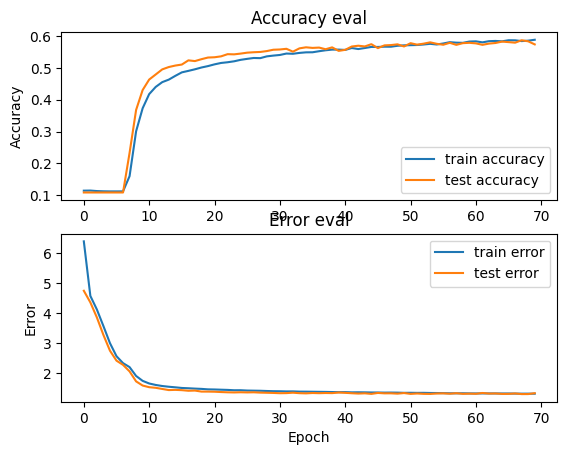

In [8]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
plot_history(history)